Load Cleaned Dataset.

In [36]:
import pandas as pd
badminton2 = pd.read_csv('badmintondata2_cleaned_data.csv', header='infer')

badminton2

,SHOT_ID,HUMAN PLAYER POSITION (X) metres,HUMAN PLAYER POSITION (Y) metres,INITITAL VELOCITY OF SHUTTELCOCK(m/s),INITIAL SHUTTELCOCK FIRING ANGLE (DEGREE),SHUTTELCOCK SLANT ANGLE TO SIDELINE(DEGREE),SHUTTLECOCK POSITIION IN AIR(X ) metres,SHUTTLECOCK POSITIION IN AIR(Y) metres,SHUTTLECOCK POSITIION IN AIR(Z) metres,OUT_OF_COURT_SHOTS
0,1,4,1,10,40,0,4.074748,1.000000,2.664781,1
1,1,4,1,10,40,0,4.152552,1.000000,2.727645,1
2,1,4,1,10,40,0,4.225975,1.000000,2.787371,1
3,1,4,1,10,40,0,4.302336,1.000000,2.847031,1
4,1,4,1,10,40,0,4.377311,1.000000,2.905658,1
...,...,...,...,...,...,...,...,...,...,...
56631,408,4,4,10,60,50,8.061748,8.840603,6.084177,0
56632,408,4,4,10,60,50,8.088022,8.871915,6.044289,0
56633,408,4,4,10,60,50,8.111243,8.899588,6.001045,0
56634,408,4,4,10,60,50,8.138342,8.931884,5.952024,0


Check Datatypes.

In [37]:
badminton2.dtypes

SHOT_ID                                          int64
HUMAN PLAYER POSITION (X) metres                 int64
HUMAN PLAYER POSITION (Y) metres                 int64
INITITAL VELOCITY OF SHUTTELCOCK(m/s)            int64
INITIAL SHUTTELCOCK FIRING ANGLE (DEGREE)        int64
SHUTTELCOCK SLANT ANGLE TO SIDELINE(DEGREE)      int64
SHUTTLECOCK POSITIION IN AIR(X ) metres        float64
SHUTTLECOCK POSITIION IN AIR(Y) metres         float64
SHUTTLECOCK POSITIION IN AIR(Z) metres         float64
OUT_OF_COURT_SHOTS                               int64
dtype: object

Dimension Reduction using PCA.

In [38]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split

# Separate predictors (X) and targets (y1 for landing position, y2 for in/out of court)
X = badminton2.drop(['SHOT_ID', 'OUT_OF_COURT_SHOTS',
               'SHUTTLECOCK POSITIION IN AIR(X ) metres', 
               'SHUTTLECOCK POSITIION IN AIR(Y) metres', 
               'SHUTTLECOCK POSITIION IN AIR(Z) metres'], axis=1) 

y = badminton2[['SHUTTLECOCK POSITIION IN AIR(X ) metres', 
           'SHUTTLECOCK POSITIION IN AIR(Y) metres', 
           'SHUTTLECOCK POSITIION IN AIR(Z) metres']]

shot_id = badminton2[['SHOT_ID']]
out_of_court_shots = badminton2[['OUT_OF_COURT_SHOTS']]

# Split into training and testing sets for y
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

shot_id_train, shot_id_test = train_test_split(shot_id, test_size=0.2, random_state=42)
out_of_court_shots_train, out_of_court_shots_test = train_test_split(out_of_court_shots, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

# Apply the same transformation to test set
X_test_scaled = scaler.transform(X_test) 

# Fit PCA to the training set
pca = PCA()
pca.fit(X_train_scaled)

PCA()

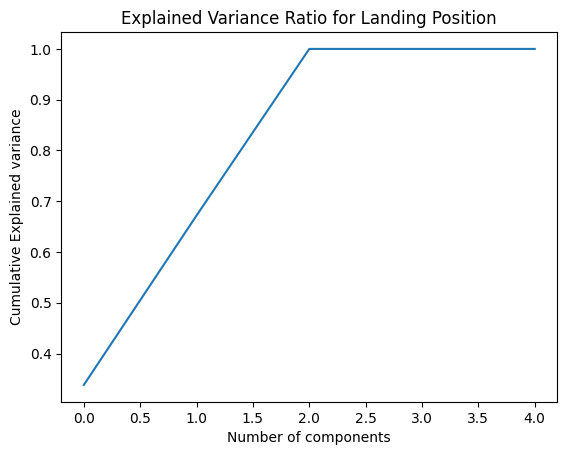

Cumulative explained variance (%):
[ 33.81703133  67.18636337 100.        ]
The PCA algorithm found 3 principal components to preserve 95% of the variability in the data.


In [39]:
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D

# Explained variance
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.title('Explained Variance Ratio for Landing Position')
plt.xlabel('Number of components')
plt.ylabel('Cumulative Explained variance')
plt.show()

# Apply PCA by setting n_components=0.95 and plot 2D Scatterplot
pca = PCA(n_components=0.95)
X_pca = pca.fit(X_train_scaled)

print("Cumulative explained variance (%):")
print(np.cumsum(pca.explained_variance_ratio_ * 100))

components = len(pca.explained_variance_ratio_)
print(f"The PCA algorithm found {components} principal components to preserve 95% of the variability in the data.")


In [40]:
# Exclude 'SHOT_ID' column from PCA analysis
pca_components = abs(pca.components_)[:, 1:]

# Print top 5 most important features in each component
print('Top 5 most important features in each component')
print('===============================================')
for row in range(pca_components.shape[0]):
    # Get the indices of the top 5 values in each row
    indices = np.argsort(-pca_components[row])[:5]
    
    # Print the top 5 feature names
    print(f'Component {row}: {badminton2.columns[indices + 1].to_list()}')

print('======================================================================================================================')
# Exclude 'SHOT_ID' column from PCA analysis
pca_components = abs(pca.components_)[:, 1:]

# Print importance values of all features in each component
print('Importance values of all features in each component')
print('==================================================')
for row in range(pca_components.shape[0]):
    # Get the importance values of all features in each row
    importance_values = pca_components[row]
    
    # Create a dictionary mapping feature names to importance values
    feature_importance = {feature: importance for feature, importance in zip(badminton2.columns[1:], importance_values)}
    
    # Print all feature names and their importance values in the component
    print(f'Component {row}:')
    for feature, importance in feature_importance.items():
        print(f'{feature}: {importance}')


Top 5 most important features in each component
Component 0: ['HUMAN PLAYER POSITION (X) metres', 'INITIAL SHUTTELCOCK FIRING ANGLE (DEGREE)', 'INITITAL VELOCITY OF SHUTTELCOCK(m/s)', 'HUMAN PLAYER POSITION (Y) metres']
Component 1: ['INITITAL VELOCITY OF SHUTTELCOCK(m/s)', 'INITIAL SHUTTELCOCK FIRING ANGLE (DEGREE)', 'HUMAN PLAYER POSITION (X) metres', 'HUMAN PLAYER POSITION (Y) metres']
Component 2: ['HUMAN PLAYER POSITION (X) metres', 'INITIAL SHUTTELCOCK FIRING ANGLE (DEGREE)', 'INITITAL VELOCITY OF SHUTTELCOCK(m/s)', 'HUMAN PLAYER POSITION (Y) metres']
Importance values of all features in each component
Component 0:
HUMAN PLAYER POSITION (X) metres: 0.7122470657303762
HUMAN PLAYER POSITION (Y) metres: 0.0
INITITAL VELOCITY OF SHUTTELCOCK(m/s): 0.064770917749059
INITIAL SHUTTELCOCK FIRING ANGLE (DEGREE): 0.6989340781307016
Component 1:
HUMAN PLAYER POSITION (X) metres: 0.1386247773075327
HUMAN PLAYER POSITION (Y) metres: 3.3306690738754696e-16
INITITAL VELOCITY OF SHUTTELCOCK(m/s):

Important features results are same with badmintondata1.

In [41]:
# Transform both the training set and the test set using the trained PCA object
X_train_pca = pca.transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

print(f"Training set shape: {X_train_pca.shape}")
print(X_train_pca)
print(f"Test set shape: {X_test_pca.shape}")
print(X_test_pca)

Training set shape: (45308, 3)
[[ 0.23221582  0.83632815  1.07553418]
 [ 1.0627751   0.89779984  0.64270409]
 [-0.87175465 -1.11315844  0.84500252]
 ...
 [ 0.126395    1.54203886 -1.50165681]
 [-0.38860073  1.04108425  0.47418552]
 [ 0.13110284 -1.44391828  1.81641189]]
Test set shape: (11328, 3)
[[-0.56650167 -0.8784316  -0.09666105]
 [-2.06563262 -0.71939672 -0.31143721]
 [ 0.69945642  1.35303323 -0.94656574]
 ...
 [-0.32772608 -0.95718394  0.13462689]
 [-0.75752215 -0.81542973 -0.28169141]
 [-1.43921334  1.38759456 -0.54348144]]


In [42]:
# Create a DataFrame from the PCA result
df_pca_train = pd.DataFrame(data = X_train_pca, columns = [f"PC{i+1}" for i in range(X_train_pca.shape[1])])
df_pca_train = pd.concat([df_pca_train, y_train.reset_index(drop=True), shot_id_train.reset_index(drop=True), out_of_court_shots_train.reset_index(drop=True)], axis=1)

df_pca_test = pd.DataFrame(data = X_test_pca, columns = [f"PC{i+1}" for i in range(X_test_pca.shape[1])])
df_pca_test = pd.concat([df_pca_test, y_test.reset_index(drop=True), shot_id_test.reset_index(drop=True), out_of_court_shots_test.reset_index(drop=True)], axis=1)

# Reorder the columns to move SHOT_ID to the left-most column
cols = df_pca_train.columns.tolist()
cols = cols[-2:-1] + cols[:-2] + cols[-1:]
df_pca_train = df_pca_train[cols]
df_pca_test = df_pca_test[cols]

print(f"The size of the df_pca_train including the label column is: {df_pca_train.shape}")
print(f"The size of the df_pca_test including the label column is: {df_pca_test.shape}")


The size of the df_pca_train including the label column is: (45308, 8)
The size of the df_pca_test including the label column is: (11328, 8)


In [43]:
# Save the PCA result to a CSV file
df_pca_train.to_csv("pca_95_badmintondata_train.csv", index=False)
df_pca_test.to_csv("pca_95_badmintondata_test.csv", index=False)

print("PCA results saved to 'pca_95_badmintondata_train.csv' and 'pca_95_badmintondata_test.csv'")

PCA results saved to 'pca_95_badmintondata_train.csv' and 'pca_95_badmintondata_test.csv'


Predict with PCA results and XYZ coordinates.

In [44]:
pca_train = pd.read_csv('pca_95_badmintondata_train.csv', header='infer')

# Separate predictors (X) and targets (y1 for landing position, y2 for in/out of court)
X_train = pca_train.drop(['SHOT_ID', 'OUT_OF_COURT_SHOTS',
               'SHUTTLECOCK POSITIION IN AIR(X ) metres', 
               'SHUTTLECOCK POSITIION IN AIR(Y) metres', 
               'SHUTTLECOCK POSITIION IN AIR(Z) metres'], axis=1) 

y_train = pca_train[['SHUTTLECOCK POSITIION IN AIR(X ) metres', 
           'SHUTTLECOCK POSITIION IN AIR(Y) metres', 
           'SHUTTLECOCK POSITIION IN AIR(Z) metres']]

pca_test = pd.read_csv('pca_95_badmintondata_test.csv', header='infer')

# Separate predictors (X) and targets (y1 for landing position, y2 for in/out of court)
X_test = pca_test.drop(['SHOT_ID', 'OUT_OF_COURT_SHOTS',
               'SHUTTLECOCK POSITIION IN AIR(X ) metres', 
               'SHUTTLECOCK POSITIION IN AIR(Y) metres', 
               'SHUTTLECOCK POSITIION IN AIR(Z) metres'], axis=1) 

y_test = pca_test[['SHUTTLECOCK POSITIION IN AIR(X ) metres', 
           'SHUTTLECOCK POSITIION IN AIR(Y) metres', 
           'SHUTTLECOCK POSITIION IN AIR(Z) metres']]

In [45]:
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.model_selection import cross_val_score

# For landing position prediction (regression)
regressor = RandomForestRegressor(n_estimators=100, random_state=42)
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

# Cross-validation
scores_reg = cross_val_score(regressor, X_train, y_train, cv=5)

# Check the average cross-validation score
print("Average cross-validation score (regression): {:.2f}".format(scores_reg.mean()))

Average cross-validation score (regression): 0.30


The model is able to explain 30% of the variance in the target variable. (Quite Low)

In [46]:
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.metrics import accuracy_score, classification_report

# For landing position prediction
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("Test set scores for landing position prediction:")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R2 Score: {r2}")

Test set scores for landing position prediction:
Mean Absolute Error (MAE): 1.0081289828304147
Mean Squared Error (MSE): 1.6386218158711572
Root Mean Squared Error (RMSE): 1.2800866438921847
R2 Score: 0.2926382546438599


MAE: 1.01. This means on average the model is off by about 1.00 meters when predicting the landing position.

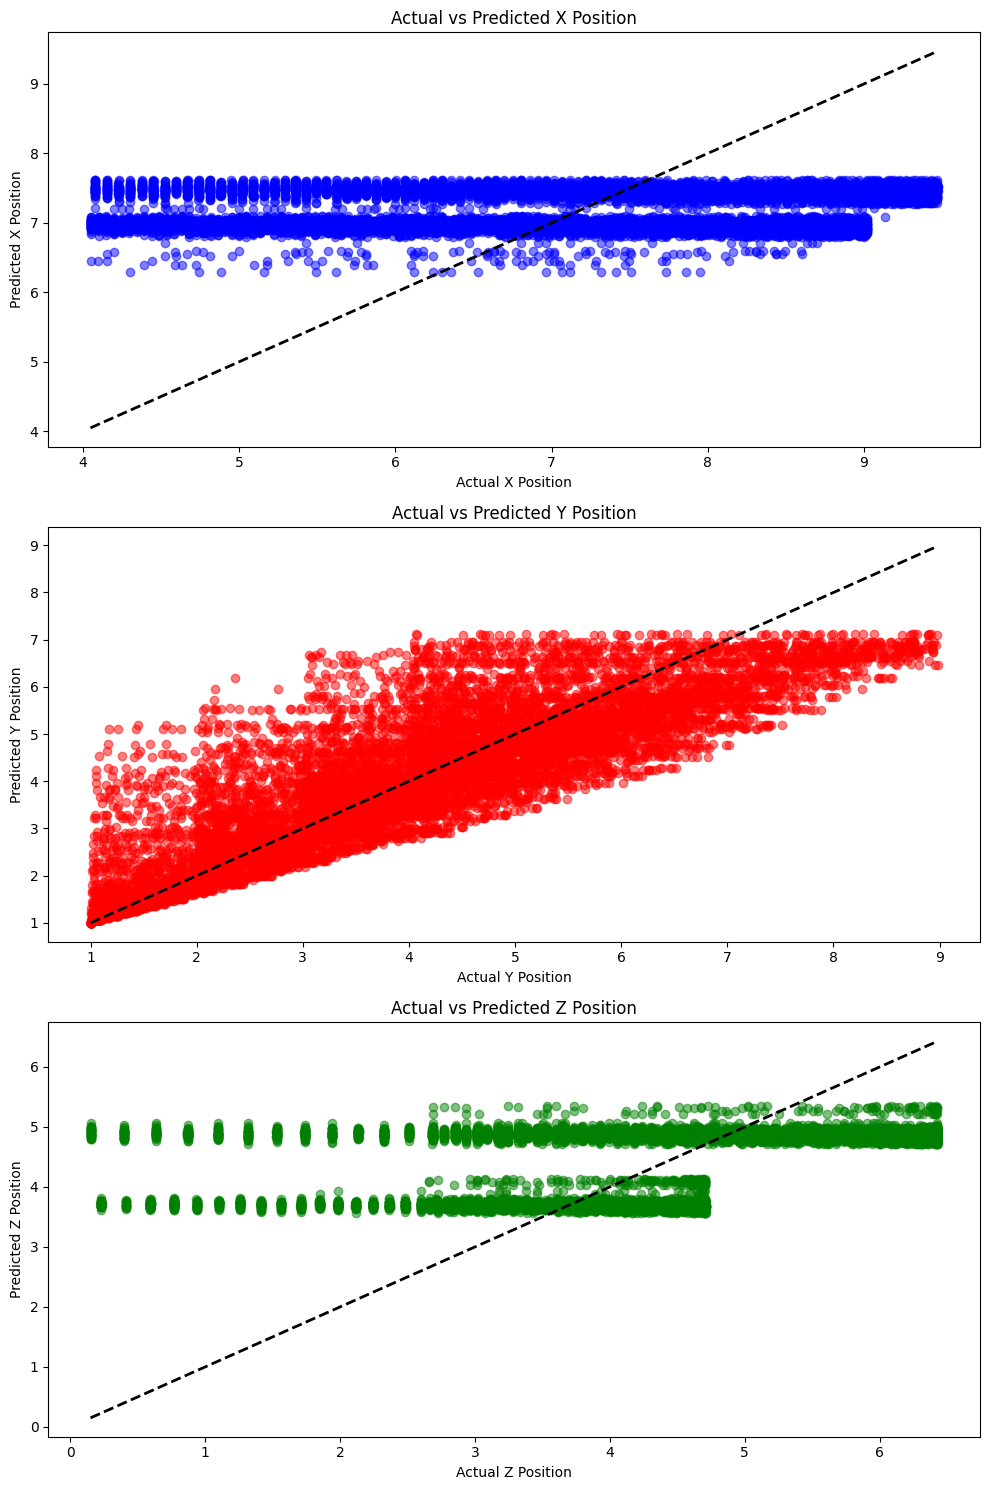

In [47]:
# Create scatter plots
fig, ax = plt.subplots(3, 1, figsize=(10, 15))

# Scatter plot for X position
ax[0].scatter(y_test.iloc[:, 0], y_pred[:, 0], color='blue', alpha=0.5)
ax[0].plot([y_test.iloc[:, 0].min(), y_test.iloc[:, 0].max()], [y_test.iloc[:, 0].min(), y_test.iloc[:, 0].max()], 'k--', lw=2)
ax[0].set_xlabel('Actual X Position')
ax[0].set_ylabel('Predicted X Position')
ax[0].set_title('Actual vs Predicted X Position')

# Scatter plot for Y position
ax[1].scatter(y_test.iloc[:, 1], y_pred[:, 1], color='red', alpha=0.5)
ax[1].plot([y_test.iloc[:, 1].min(), y_test.iloc[:, 1].max()], [y_test.iloc[:, 1].min(), y_test.iloc[:, 1].max()], 'k--', lw=2)
ax[1].set_xlabel('Actual Y Position')
ax[1].set_ylabel('Predicted Y Position')
ax[1].set_title('Actual vs Predicted Y Position')

# Scatter plot for Z position
ax[2].scatter(y_test.iloc[:, 2], y_pred[:, 2], color='green', alpha=0.5)
ax[2].plot([y_test.iloc[:, 2].min(), y_test.iloc[:, 2].max()], [y_test.iloc[:, 2].min(), y_test.iloc[:, 2].max()], 'k--', lw=2)
ax[2].set_xlabel('Actual Z Position')
ax[2].set_ylabel('Predicted Z Position')
ax[2].set_title('Actual vs Predicted Z Position')

# Display the plot
plt.tight_layout()
plt.show()